# $\text{Testes com a classe}$

In [52]:
#Imports e Configurações ----------------------------------------------------------------------------------------------

import sympy as sp
import numpy as np
import random as rd
import matplotlib.pyplot as plt

j = 1j

In [53]:
#Definição da classe

class CartaSmith():
    def __init__(self, Z0, grid_color: str, figureSize: float, figdpi: int = 100):
        self.Z0 = Z0
        self.grid_color = grid_color
        self.figureSize = figureSize
        self.figdpi = figdpi

    # Método interno para criar arcos num centro C, raio r e ângulo theta.

    def ci(self, c: tuple, r: float, theta_deg: tuple = (0, 360), col: str = 'r', linewidth: float = 1, linestyle: str = '-'):
        xc, yc = c
        theta_rad: tuple = [(2*np.pi*theta_deg[i])/360 for i in range(0, 2, 1)]
        theta = np.linspace(theta_rad[0], theta_rad[1], 1000)
        x = r*np.cos(theta) + xc
        y = r*np.sin(theta) + yc
        plt.plot(x, y, c = col, ls = linestyle, lw = linewidth, zorder = 0)

    # Criador de texto ao longo de um arco

    def textCi(self, c: tuple, r: float, text: str, theta_deg: float, ajuste: float = 0, rotac: bool = True, linha: bool = False, tamL: float = 1, cor = 'default', tamDuplo:bool = False, lwd: float = 1):
        xc, yc = c
        theta_rad = (theta_deg*2*np.pi/360) - theta_deg*0.0001
        rAj = r + 0.03*r - ajuste*r
        corL = self.grid_color if cor == 'default' else cor
        x = rAj*np.cos(theta_rad) - rAj*np.cos(theta_rad)*0.02 + xc
        y = rAj*np.sin(theta_rad) + yc
        rot = (theta_deg - 90) if rotac else 0
        if not(linha):
            plt.text(x, y, text, size = 10, c = self.grid_color, rotation = rot, ha = 'center', va = 'bottom', rotation_mode = 'anchor', zorder = 0) #ha: horizontalalignment
        elif linha:
            x = r*np.cos(theta_rad*1.007)*1.005 * (1 - tamL*0.01) + xc if tamDuplo else r*np.cos(theta_rad*1.007)*1.005 + xc
            y = r*np.sin(theta_rad*1.007)*1.005 * (1 - tamL*0.01) + yc if tamDuplo else r*np.sin(theta_rad*1.007)*1.005 + yc
            xN = (x - xc) * (1 + tamL*0.02)
            yN = (y - yc) * (1 + tamL*0.02)
            plt.plot([x, xN], [y, yN], c = corL, linewidth = lwd)

    def moebius(self, X, mode: str = 'Z'): #Moebius Transformation
        if mode == 'Z':
            gamma = ((X - self.Z0)/(X + self.Z0))
        elif mode == 'Y':
            Y0 = 1/self.Z0
            gamma = ((X - Y0)/(X + Y0))
        return sp.simplify(gamma)
    
    # Função para o cálculo do coeficiente de reflexão

    def reflCoef(self, X, mode: str = 'Z') -> tuple:
        gamma = self.moebius(X)
        gammaRe = float(sp.re(gamma))
        gammaIm = float(sp.im(gamma))
        gammaC = np.sqrt(gammaRe**2 + gammaIm**2)
        ang = (np.arctan(gammaIm/gammaRe)) * (180/np.pi)
        return (gammaC, ang)
        
    # Diagrama de impedância. Retorna a figura e os axes da carta de smith

    def impedChart(self):
        fig = plt.figure(figsize = (self.figureSize, self.figureSize), dpi = self.figdpi, facecolor = "#464646")
        ax = plt.axes()

        #Círculos no y = 0 ------------------------------------------------------------------------------------------
        valorR = ['10', '5', '4', '3', '2', '1', '0,9', '0,8', '0,7', '0,6', '0,5', '0,4', '0,3', '0,2', '0,1']
        raiosR = [1/11, 1/6, 1/5, 1/4, 1/3, 1/2, 10/19,   5/9, 10/17,   5/8,   2/3,   5/7, 10/13,   5/6, 10/11]

        self.ci((0,0), 1, (0, 360), self.grid_color) #0
        for i in range(14, -1, -1):
            self.ci((1-raiosR[i],0), raiosR[i], (0, 360), self.grid_color)
        #Textos nos círculos
        ajus = [0, 0, 0, 0, 0, 0.13, 0.02, 0.015, 0.015, 0.008, 0.008, 0.01, 0, 0, 0]
        angtR = [120, 153, 148, 140, 128, 157.6, 157, 156, 154.5, 153, 151.4, 149.3, 147.1, 145, 141.5]
        for k in range(14, -1, -1):
            self.textCi((1-raiosR[k],0), raiosR[k], valorR[k], angtR[k], ajus[k])

        self.textCi((0,0), 1, '0', 180.75, -0.008)

        #Círculos no x = 1 -------------------------------------------------------------------------------------------
        valorI = ['3', '2', '1', '0,5', '0,3', '0,2', '0,1', '-0,1', '-0,2', '-0,3', '-0,5', '-1', '-2', '-3']
        valyI =  [1/3, 1/2, 1, 2, 10/3, 5, 10, -10, -5, -10/3, -2, -1, -1/2, -1/3]
        inter =  [(127, 270), (143.5, 270), (180, 270), (217, 270), (236.6, 270), (247.4, 270), (258.61, 270), (90, 101.39), (90, 112.6), (90, 123.4), (90, 143), (90, 180), (90, 216.5), (90, 233)]
        angtI =  [36.5, 53, 90, 127.7, 147.7, 158.3, 169.3, -169.3, -158.3, -147.7, -127.7, -90, -53, -36.5]

        for c in range(0, 14, 1):
            self.ci((1,valyI[c]), abs(valyI[c]), inter[c], self.grid_color)
            self.textCi((0,0), 1, valorI[c], angtI[c])

        #Círculo externo do ângulo do coeficiente de reflexão ---------------------------------------------------------

        self.ci((0,0), 1.15, (0, 360), self.grid_color)
        ang = 0
        for g in range(0, 36):
            ajuste = ang*1.006 if np.sin(ang * (np.pi/180)) < 0 else ang*1.007 if (np.sin(ang * (np.pi/180)) > 0 and np.cos(ang * (np.pi/180)) < 0) else ang
            self.textCi((0,0), 1.2, str(ang), ajuste, 0.03)
            self.textCi((0,0), 1.15, '', ang, 0, True, True)
            ang += 10

        #Retas Re e Im ------------------------------------------------------------------------------------------------
        x = np.linspace(-1, 1, 2)
        plt.plot(x, 0*x, self.grid_color, lw = 2, zorder = 0)
        plt.plot(0*x, x, self.grid_color, lw = 2, zorder = 0)

        plt.axis('off')
        plt.grid(True, ls = (0, (1, 9)))
        ax.set_xlim(-1.4, 1.4)
        ax.set_ylim(-1.4, 1.4)
        plt.title("Smith's Chart", c = 'w')
        plt.text(-1, -1.2, fr"$Z_0 = {self.Z0}\,\Omega$", c = 'w', fontsize = 11)

        plt.close()
        return fig, ax
    
    



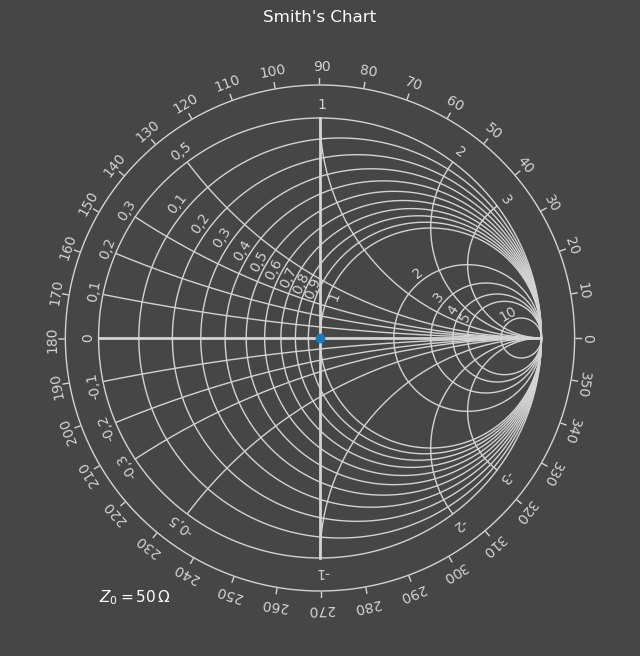

In [54]:
carta = CartaSmith(50, "lightgray", 8)
fig, ax = carta.impedChart()
fig2 = plt.figure(fig)

ax.plot(0, 0, marker = "o")
plt.show()